<a href="https://colab.research.google.com/github/vodkolav/DSlab1/blob/Colab/DSlab2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/vodkolav/DSlab1/blob/Colab/DSlab2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 submission
for course: Data Science lab 2   
by  Michael Berger   


Lecturer: Dr. Sharon Yalov-Handzel  
Afeka College of engineering


In [1]:
#context = "DEBUG"
context = "RELEASE"

try:
  from google.colab import drive
  drive.mount('/content/drive',)
  pfx = "/content/drive/MyDrive/Studies/M.Sc/DSlab2"
  IN_COLAB = True
except:
  pfx = ""
  IN_COLAB = False

Mounted at /content/drive


## 1. Use the dataset from UCI Machine Learning Repository:
"Individual household electric power consumption" for performing time series analysis.  
https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

In [2]:
! pip install ucimlrepo
! pip install scikit-learn==1.4.2
! pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Attention, Concatenate
from tensorflow.keras.utils import plot_model

import os
from datetime import datetime
import statistics as stat

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

from ucimlrepo import fetch_ucirepo , dotdict
pd.set_option('display.precision', 3)

from pathlib import Path
import pickle


In [4]:
# make plotly plots appear on github preview
#pio.renderers.default = "notebook_connected"
#pio.renderers.default = "notebook+pdf"
#pio.renderers.default = "sphinx_gallery"
#pio.renderers.default = "plotly_mimetype+jpeg"

In [5]:
print(tf.config.list_physical_devices('GPU'))

[]


In [4]:
fn = r"data/individual_household_electric_power_consumption.pkl"
pth = Path(pfx) / Path(fn)

In [5]:
if pth.exists():
    with open(pth, "rb") as fl:
        individual_household_electric_power_consumption = pickle.load(fl)
else:

    individual_household_electric_power_consumption = fetch_ucirepo(id=235)
    pth.parent.mkdir(parents=True, exist_ok=True)
    with open(pth, "wb") as fl:
        pickle.dump(individual_household_electric_power_consumption, fl)


In [6]:
# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# variable information
print(individual_household_electric_power_consumption.variables)

                    name     role         type demographic description units  \
0                   Date  Feature         Date        None        None  None   
1                   Time  Feature  Categorical        None        None  None   
2    Global_active_power  Feature   Continuous        None        None  None   
3  Global_reactive_power  Feature   Continuous        None        None  None   
4                Voltage  Feature   Continuous        None        None  None   
5       Global_intensity  Feature   Continuous        None        None  None   
6         Sub_metering_1  Feature   Continuous        None        None  None   
7         Sub_metering_2  Feature   Continuous        None        None  None   
8         Sub_metering_3  Feature   Continuous        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7             no  
8             no  


In [9]:
import json
# metadata
meta = json.dumps(individual_household_electric_power_consumption.metadata,indent=2)
print(meta)

{
  "uci_id": 235,
  "name": "Individual Household Electric Power Consumption",
  "repository_url": "https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption",
  "data_url": "https://archive.ics.uci.edu/static/public/235/data.csv",
  "abstract": "Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.",
  "area": "Physics and Chemistry",
  "tasks": [
    "Regression",
    "Clustering"
  ],
  "characteristics": [
    "Multivariate",
    "Time-Series"
  ],
  "num_instances": 2075259,
  "num_features": 9,
  "feature_types": [
    "Real"
  ],
  "demographics": [],
  "target_col": null,
  "index_col": null,
  "has_missing_values": "no",
  "missing_values_symbol": null,
  "year_of_dataset_creation": 2006,
  "last_updated": "Fri Mar 08 2024",
  "dataset_doi": "10.24432/C58K54",
  "creators": [
    "Georges Hebrail",
   

In [10]:
metadic = individual_household_electric_power_consumption.metadata

In [11]:
def mylen(o):
    if type(o)==int:
        return str(o)
    if type(o)==type(None):
        return "0"
    else:
        return len(o)

In [12]:
def showkeys(dic, ind = 0):
    if type(dic)== dotdict:
        for k,v  in dic.items() :
            print(" "*ind , k, "|", type(v).__name__, ",", mylen(v) )
            showkeys(dic[k], ind+4)

showkeys(metadic)

 uci_id | int , 235
 name | str , 47
 repository_url | str , 87
 data_url | str , 54
 abstract | str , 200
 area | str , 21
 tasks | list , 2
 characteristics | list , 2
 num_instances | int , 2075259
 num_features | int , 9
 feature_types | list , 1
 demographics | list , 0
 target_col | NoneType , 0
 index_col | NoneType , 0
 has_missing_values | str , 2
 missing_values_symbol | NoneType , 0
 year_of_dataset_creation | int , 2006
 last_updated | str , 15
 dataset_doi | str , 15
 creators | list , 2
 intro_paper | NoneType , 0
 additional_info | dotdict , 9
     summary | str , 780
     purpose | NoneType , 0
     funded_by | NoneType , 0
     instances_represent | NoneType , 0
     recommended_data_splits | NoneType , 0
     sensitive_data | NoneType , 0
     preprocessing_description | NoneType , 0
     variable_info | str , 913
     citation | NoneType , 0


In [13]:
print(metadic["abstract"])

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.


In [14]:
print(metadic["additional_info"]["summary"])

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes: 
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


In [15]:
print(metadic["additional_info"]["variable_info"])

1.date: Date in format dd/mm/yyyy
2.time: time in format hh:mm:ss
3.global_active_power: household global minute-averaged active power (in kilowatt)
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5.voltage: minute-averaged voltage (in volt)
6.global_intensity: household global minute-averaged current intensity (in ampere)
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


## 2. Perform Exploratory Data Analysis (EDA) of the dataset:

First, convert all values to numeric

In [7]:
numcols = ['Global_active_power', 'Global_reactive_power',
           'Voltage', 'Global_intensity', 'Sub_metering_1',
           'Sub_metering_2', 'Sub_metering_3']

for c in numcols:
    X[c] = pd.to_numeric(X[c], errors = "coerce")

combine date and time into single col datetime

In [8]:
dt = X["Date"] + " " + X["Time"]
X["datetime"] = pd.to_datetime(dt, dayfirst=True)
X = X.set_index('datetime').drop(["Date","Time"],axis=1)

### a.  Visualize time series trends

In [18]:
def summary(df):
    nonnans = df.shape[0] - df.isna().sum()
    nonnansPrc = (nonnans / df.shape[0] * 100).apply("{0:.2f}%".format)
    sam = df.sample(1, random_state=42).squeeze()
    res = pd.DataFrame([sam.index, df.dtypes.astype(str), nonnans,
                        nonnansPrc, df.nunique(), sam]).transpose()
    res.columns = ["Column", "data type", "non-null values",
                   "non-null values %", "unique values", "example"]
    res.sort_values("unique values",ascending=False, inplace=True)
    return res

In [19]:
X.head()

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [20]:

pd.options.display.float_format = '{:,.4f}'.format
d = X.describe()
d

Global_active_power  Global_reactive_power        Voltage  \
count       2,049,280.0000         2,049,280.0000 2,049,280.0000   
mean                1.0916                 0.1237       240.8399   
std                 1.0573                 0.1127         3.2400   
min                 0.0760                 0.0000       223.2000   
25%                 0.3080                 0.0480       238.9900   
50%                 0.6020                 0.1000       241.0100   
75%                 1.5280                 0.1940       242.8900   
max                11.1220                 1.3900       254.1500   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count    2,049,280.0000  2,049,280.0000  2,049,280.0000  2,049,280.0000  
mean             4.6278          1.1219          1.2985          6.4584  
std              4.4444          6.1530          5.8220          8.4372  
min              0.2000          0.0000          0.0000          0.0000  
25%              1.4000          0.0000          0.0000          0.0000  
50%              2.6000          0.0000          0.0000          1.0000  
75%              6.4000          0.0000          1.0000         17.0000  
max             48.4000         88.0000         80.0000         31.0000

In [21]:
summary(X)

Column data type non-null values non-null values %  \
0    Global_active_power   float64         2049280            98.75%   
2                Voltage   float64         2049280            98.75%   
1  Global_reactive_power   float64         2049280            98.75%   
3       Global_intensity   float64         2049280            98.75%   
4         Sub_metering_1   float64         2049280            98.75%   
5         Sub_metering_2   float64         2049280            98.75%   
6         Sub_metering_3   float64         2049280            98.75%   

  unique values  example  
0          4186   0.2560  
2          2837 242.0000  
1           532   0.1060  
3           221   1.2000  
4            88   0.0000  
5            81   0.0000  
6            32   1.0000

### b. Check for seasonality and cyclical patterns

- Analyze distribution of power consumption
- Identify and handle missing values or outliers

## 3. Implement a linear regression model to predict power consumption for the last three time periods:

extract a smaller set Xs for debugging  

In [9]:
# backup original dataset as data to re-process later
data = X.copy(deep=True)


# debug and development values: take small chunk of data,
# few epochs and verbose output
if context == "DEBUG":
  n_sampls = 10000
  X = X.iloc[0:n_sampls,:]
  time_step = 12
  epochs = 2
  batch_size = 64
  verbose = 1
else:
  time_step = 12
  epochs = 15
  batch_size = 2048
  verbose = 1

### b. Prepare features (consider lag variables, time-based features)
features:
year
month
week
day
hour
every variable + 10 of it's lags

y's:
Global_active_power

In [23]:
# resample the data to fill the NaN values
#   Xs  or X
df= X["Global_active_power"].resample("1min").mean().ffill().to_frame()
df

Global_active_power
datetime                                
2006-12-16 17:24:00               4.2160
2006-12-16 17:25:00               5.3600
2006-12-16 17:26:00               5.3740
2006-12-16 17:27:00               5.3880
2006-12-16 17:28:00               3.6660
...                                  ...
2010-11-26 20:58:00               0.9460
2010-11-26 20:59:00               0.9440
2010-11-26 21:00:00               0.9380
2010-11-26 21:01:00               0.9340
2010-11-26 21:02:00               0.9320

[2075259 rows x 1 columns]

In [24]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
tmp = scaler.fit_transform(df)
df["Global_active_power"] = tmp
df

Global_active_power
datetime                                
2006-12-16 17:24:00               0.3748
2006-12-16 17:25:00               0.4784
2006-12-16 17:26:00               0.4796
2006-12-16 17:27:00               0.4809
2006-12-16 17:28:00               0.3250
...                                  ...
2010-11-26 20:58:00               0.0788
2010-11-26 20:59:00               0.0786
2010-11-26 21:00:00               0.0780
2010-11-26 21:01:00               0.0777
2010-11-26 21:02:00               0.0775

[2075259 rows x 1 columns]

In [25]:
for i in range(1,time_step):
    lag = i
    df[f"Global_active_power.L{lag}"] = df["Global_active_power"].shift(lag)

df.dropna(inplace = True)
df

Global_active_power  Global_active_power.L1  \
datetime                                                           
2006-12-16 17:35:00               0.4831                  0.3958   
2006-12-16 17:36:00               0.4661                  0.4831   
2006-12-16 17:37:00               0.4700                  0.4661   
2006-12-16 17:38:00               0.3601                  0.4700   
2006-12-16 17:39:00               0.2995                  0.3601   
...                                  ...                     ...   
2010-11-26 20:58:00               0.0788                  0.0788   
2010-11-26 20:59:00               0.0786                  0.0788   
2010-11-26 21:00:00               0.0780                  0.0786   
2010-11-26 21:01:00               0.0777                  0.0780   
2010-11-26 21:02:00               0.0775                  0.0777   

                     Global_active_power.L2  Global_active_power.L3  \
datetime                                                              
2006-12-16 17:35:00                  0.3246                  0.3252   
2006-12-16 17:36:00                  0.3958                  0.3246   
2006-12-16 17:37:00                  0.4831                  0.3958   
2006-12-16 17:38:00                  0.4661                  0.4831   
2006-12-16 17:39:00                  0.4700                  0.4661   
...                                     ...                     ...   
2010-11-26 20:58:00                  0.0784                  0.0788   
2010-11-26 20:59:00                  0.0788                  0.0784   
2010-11-26 21:00:00                  0.0788                  0.0788   
2010-11-26 21:01:00                  0.0786                  0.0788   
2010-11-26 21:02:00                  0.0780                  0.0786   

                     Global_active_power.L4  Global_active_power.L5  \
datetime                                                              
2006-12-16 17:35:00                  0.3281                  0.3283   
2006-12-16 17:36:00                  0.3252                  0.3281   
2006-12-16 17:37:00                  0.3246                  0.3252   
2006-12-16 17:38:00                  0.3958                  0.3246   
2006-12-16 17:39:00                  0.4831                  0.3958   
...                                     ...                     ...   
2010-11-26 20:58:00                  0.0788                  0.0786   
2010-11-26 20:59:00                  0.0788                  0.0788   
2010-11-26 21:00:00                  0.0784                  0.0788   
2010-11-26 21:01:00                  0.0788                  0.0784   
2010-11-26 21:02:00                  0.0788                  0.0788   

                     Global_active_power.L6  Global_active_power.L7  \
datetime                                                              
2006-12-16 17:35:00                  0.3118                  0.3250   
2006-12-16 17:36:00                  0.3283                  0.3118   
2006-12-16 17:37:00                  0.3281                  0.3283   
2006-12-16 17:38:00                  0.3252                  0.3281   
2006-12-16 17:39:00                  0.3246                  0.3252   
...                                     ...                     ...   
2010-11-26 20:58:00                  0.0788                  0.0858   
2010-11-26 20:59:00                  0.0786                  0.0788   
2010-11-26 21:00:00                  0.0788                  0.0786   
2010-11-26 21:01:00                  0.0788                  0.0788   
2010-11-26 21:02:00                  0.0784                  0.0788   

                     Global_active_power.L8  Global_active_power.L9  \
datetime                                                              
2006-12-16 17:35:00                  0.4809                  0.4796   
2006-12-16 17:36:00                  0.3250                  0.4809   
2006-12-16 17:37:00                  0.3118                  0.3250   
2006-12-1

### a. Split the data into training and testing sets

In [26]:
# find appropriate train/test ratio for the data
td = df.index.max() - df.index.min()
td.days * 24 * 60

2075040

In [27]:
td.days / 30

48.03333333333333

In [28]:
X.shape

(2075259, 7)

In [29]:
1- (3 * 30 * 24 * 60 ) / X.shape[0]

0.9375499636430923

In [30]:
# Split the data into feature and target
target = "Global_active_power"
t = df[target]
P = df.drop(columns= target)
#Split the data into train and test sets
cutoff = int(len(P) * 0.94) # size of train
X_train, y_train = P[:cutoff], t[:cutoff]
X_test, y_test = P[cutoff:], t[cutoff:]

In [31]:
X_train.shape, X_test.shape

((1950733, 11), (124515, 11))

### c. Train the model and make predictions

In [32]:
LR_model = LinearRegression()
res = LR_model.fit(X_train, y_train)


In [33]:
df_pred_test = pd.DataFrame(
             {
             "y_test": y_test,
             "LinearRegression": LR_model.predict(X_test).squeeze()
             })
df_pred_test

y_test  LinearRegression
datetime                                     
2010-09-01 09:48:00  0.0246            0.0263
2010-09-01 09:49:00  0.0373            0.0259
2010-09-01 09:50:00  0.0344            0.0395
2010-09-01 09:51:00  0.0244            0.0345
2010-09-01 09:52:00  0.0281            0.0249
...                     ...               ...
2010-11-26 20:58:00  0.0788            0.0785
2010-11-26 20:59:00  0.0786            0.0788
2010-11-26 21:00:00  0.0780            0.0789
2010-11-26 21:01:00  0.0777            0.0789
2010-11-26 21:02:00  0.0775            0.0782

[124515 rows x 2 columns]

In [34]:
def compare_preds(df):
    # compare predictions of different models
    # over a small (for performance) chunk of data
    df_pred_test = df[:10000]
    fig = px.line(df_pred_test, labels= {"value": "Powah!"},
              title = "Actual powah vs. Predicted powah.")
    return fig

In [35]:
compare_preds(df_pred_test)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## 4. Evaluate the linear regression model using appropriate metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R²) value

In [36]:
experiments = pd.DataFrame(columns=['model','data'])

In [37]:
def sqiz(y):
    # required to deal with higher dimensional outputs
    if len(y.shape)>2 and y.shape[2]>1:
        y = y[:,0,0]
    return y.squeeze()


def pipeline(model, x_train, y_train, x_test, y_test, model_args={}):

    margs = model_args.copy() # there is no pass-by-value in python, duh
    # Train the model
    print(f"training model, please wait...")
    model.fit(x_train, y_train, **margs) # , epochs=epochs, validation_split= .1, verbose=0)

    if len(model_args.values())>0:
        margs.pop("epochs")
        margs.pop("verbose")

    print(f"evaluating model, please wait...")
    y_trn_pred = model.predict(x_train, **margs)
    y_pred = model.predict(x_test, **margs)

    #TODO: Invert predictions back to original values range?
    # train_predict = scaler.inverse_transform(train_predict)
    # Y = scaler.inverse_transform([Y])

    #df_pred_test = pd.DataFrame({"y_test": y_test,"y_pred": y_pred})

    res = {}
    print("1) y_train.shape: ", y_train.shape,"| y_trn_pred.shape: ", y_trn_pred.shape)
    # Evaluate the model on train set
    y_train = sqiz(y_train)
    y_trn_pred = sqiz(y_trn_pred)
    print("2) y_train.shape: ", y_train.shape,"| y_trn_pred.shape: ", y_trn_pred.shape)

    # note: [] on rhs are required for converting to df later on
    res["trn_MAE"] = [mean_absolute_error(y_train, y_trn_pred)]
    res["trn_MSE"] = [mean_squared_error(y_train, y_trn_pred)]
    res["trn_RMSE"] = [root_mean_squared_error(y_train, y_trn_pred)]
    res["trn_Rsq"] = [r2_score(y_train, y_trn_pred)]

    print("1) y_test.shape: ", y_test.shape,"| y_pred.shape: ", y_pred.shape)
    # Evaluate the model on test set
    y_test = sqiz(y_test)
    y_pred = sqiz(y_pred)
    print("2) y_test.shape: ", y_test.shape,"| y_pred.shape: ", y_pred.shape)

    res["tst_MAE"] = [mean_absolute_error(y_test, y_pred)]
    res["tst_MSE"] = [mean_squared_error(y_test, y_pred)]
    res["tst_RMSE"] = [root_mean_squared_error(y_test, y_pred)]
    res["tst_Rsq"] = [r2_score(y_test, y_pred)]
    print("done")
    return model, res


In [38]:

def report(result, model_label, data_label):
    a = result
    a["model"] = model_label
    a["data"] = data_label
    log_df = pd.DataFrame(a)
    global experiments

    row = experiments.query(f"model=='{model_label}' and data == '{data_label}'")
    if(experiments.shape[0]>0) and len(row) > 0:
        import warnings
        warnings.warn(f"experiment data  for model label '{model_label}' \n\
        and data label '{data_label}' already exist. replacing.")
        experiments.drop(row.index, inplace=True)
        #experiments[["model","data"]].head()
        #drop(fit_runs, 'data', label)

    experiments = pd.concat([experiments, log_df])
    experiments.reset_index(drop=True, inplace=True)
    #print(experiments.head())

    metrics = list(result.keys())
    metrics.sort()

    log_df_melted = experiments.melt(id_vars=['model','data'],
                            value_vars= metrics, #['accuracy', 'loss'],
                            var_name='metric',
                            value_name='value')

    rx = r"(?P<set>[trns]+_)?(?P<metric>[\dA-Za-z-]+)"
    nspl = log_df_melted.metric.str.extract(rx)
    log_df_melted.drop('metric',axis=1, inplace=True)
    log_df_melted = log_df_melted.join(nspl)
    log_df_melted.loc[log_df_melted.set == "trn_", "set"] = "trn"
    #log_df_melted.loc[log_df_melted.set == "val_", "set"] = "val"
    log_df_melted.loc[log_df_melted.set == "tst_", "set"] = "tst"

    log_df_melted = log_df_melted.query("metric!='Rsq'")

    ttl = "table cols: models | cell x axis: different processings of the dataset | colors: training or testing set <br>" + \
          "table rows: metrics| cell y axis: value of given metric for given dataset and model <br>"


    dims_vert = {'x':'data',
            'y':'value',
            'facet_row':'metric',
            'facet_col':'model',
            'color':'set'}

    dims_horz = {'x':'value',
            'y':'data',
            'facet_row':'model',
            'facet_col':'metric',
            'color':'set'}

    fig = px.bar(log_df_melted, title= ttl,
                 barmode = 'group', text_auto='.2',
                 category_orders={"set": ["trn","val","tst"]},
                 **dims_horz )

    #fig.update_yaxes(matches=None,)
    # Update layout
    fig.update_layout(height=800, width=1000)


    #fig.update_yaxes(matches='y domain')
    return fig

In [39]:
baseline_model = DummyRegressor(strategy='mean')

In [40]:
baseline_model, res = pipeline(baseline_model, X_train, y_train, X_test, y_test)

report(res, "Baseline", "basic")


training model, please wait...
evaluating model, please wait...
1) y_train.shape:  (1950733,) | y_trn_pred.shape:  (1950733,)
2) y_train.shape:  (1950733,) | y_trn_pred.shape:  (1950733,)
1) y_test.shape:  (124515,) | y_pred.shape:  (124515,)
2) y_test.shape:  (124515,) | y_pred.shape:  (124515,)
done


In [41]:
df_pred_test["baseline"] =  baseline_model.predict(X_test)

In [42]:
model = LinearRegression()

In [43]:
model, res = pipeline(model, X_train, y_train, X_test, y_test)
report(res, "LinearRegression", "basic")

training model, please wait...
evaluating model, please wait...
1) y_train.shape:  (1950733,) | y_trn_pred.shape:  (1950733,)
2) y_train.shape:  (1950733,) | y_trn_pred.shape:  (1950733,)
1) y_test.shape:  (124515,) | y_pred.shape:  (124515,)
2) y_test.shape:  (124515,) | y_pred.shape:  (124515,)
done


In [44]:
compare_preds(df_pred_test)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [45]:
experiments

model   data  trn_MAE  trn_MSE  trn_RMSE  trn_Rsq  tst_MAE  \
0          Baseline  basic   0.0741   0.0092    0.0959   0.0000   0.0682   
1  LinearRegression  basic   0.0088   0.0006    0.0237   0.9389   0.0079   

   tst_MSE  tst_RMSE  tst_Rsq  
0   0.0073    0.0856  -0.0003  
1   0.0004    0.0208   0.9409

## 5. Recurrent Neural Network (RNN)
Implement a Recurrent Neural Network (RNN) for power consumption prediction:

### a. Preprocess data for RNN input

In [46]:
df.shape

(2075248, 12)

In [47]:
# Split the data into feature and target
target = "Global_active_power"
t = df[target]
P = df.drop(columns= target)


#Split the data into train and test sets
X_train, y_train = P[:cutoff], t[:cutoff]
X_test, y_test = P[cutoff:], t[cutoff:]

### b. Design and train the RNN model

In [48]:
#sequence_length = X_train.shape[1]

# Build an RNN model
Rnn_model = Sequential([
    Input((time_step, 1)),
    SimpleRNN(units=32, activation='relu'),
    Dense(units=1)
])

Rnn_model.compile(optimizer='adam', loss='mse')
model_args = {"epochs":epochs, "batch_size":batch_size, "verbose": verbose}

In [49]:
Rnn_model, res = pipeline(Rnn_model, X_train, y_train, X_test, y_test, model_args)

training model, please wait...
Epoch 1/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - loss: 0.0019
Epoch 2/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 5.6915e-04
Epoch 3/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 5.5524e-04
Epoch 4/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 5.5845e-04
Epoch 5/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 5.5381e-04
Epoch 6/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 5.5215e-04
Epoch 7/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 5.4813e-04
Epoch 8/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 5.4298e-04
Epoch 9/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 5.4225e-04
Epoch 10/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 5.4353e-04
Epoch 11/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 5.4211e-04
Epoch 12/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 5.4106e-04
Epoch 13/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 5.3905e-04
Epoch 14/15
953/953 

### c. Make predictions and visualize results  

 TODO: visualise the time series with predictions

In [50]:
df_pred_test["RNN"] =  Rnn_model.predict(X_test)

3892/3892 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [51]:
compare_preds(df_pred_test)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### d. Compare performance metrics with linear regression

In [52]:
report(res, "RNN", "basic")

## 6. Long Short-Term Memory (LSTM)
Implement Long Short-Term Memory (LSTM) for power consumption prediction:


### a. Preprocess data for LSTM input

In [53]:
# Split the data into feature and target
target = "Global_active_power"
t = df[[target]]
P = df.drop(columns= target)

#Split the data into train and test sets
X_train, y_train = P[:cutoff], t[:cutoff]
X_test, y_test = P[cutoff:], t[cutoff:]

In [54]:
X_train.shape, y_train.shape

((1950733, 11), (1950733, 1))

### b. Design and train the LSTM model

In [55]:
# Create and fit the LSTM network
LSTM_model = Sequential()
LSTM_model.add(Input((time_step, 1)))
LSTM_model.add(LSTM(50, return_sequences=True ))
LSTM_model.add(LSTM(50, return_sequences=False))
LSTM_model.add(Dense(1))

LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

model_args = {"epochs":epochs, "batch_size":batch_size, "verbose":verbose}

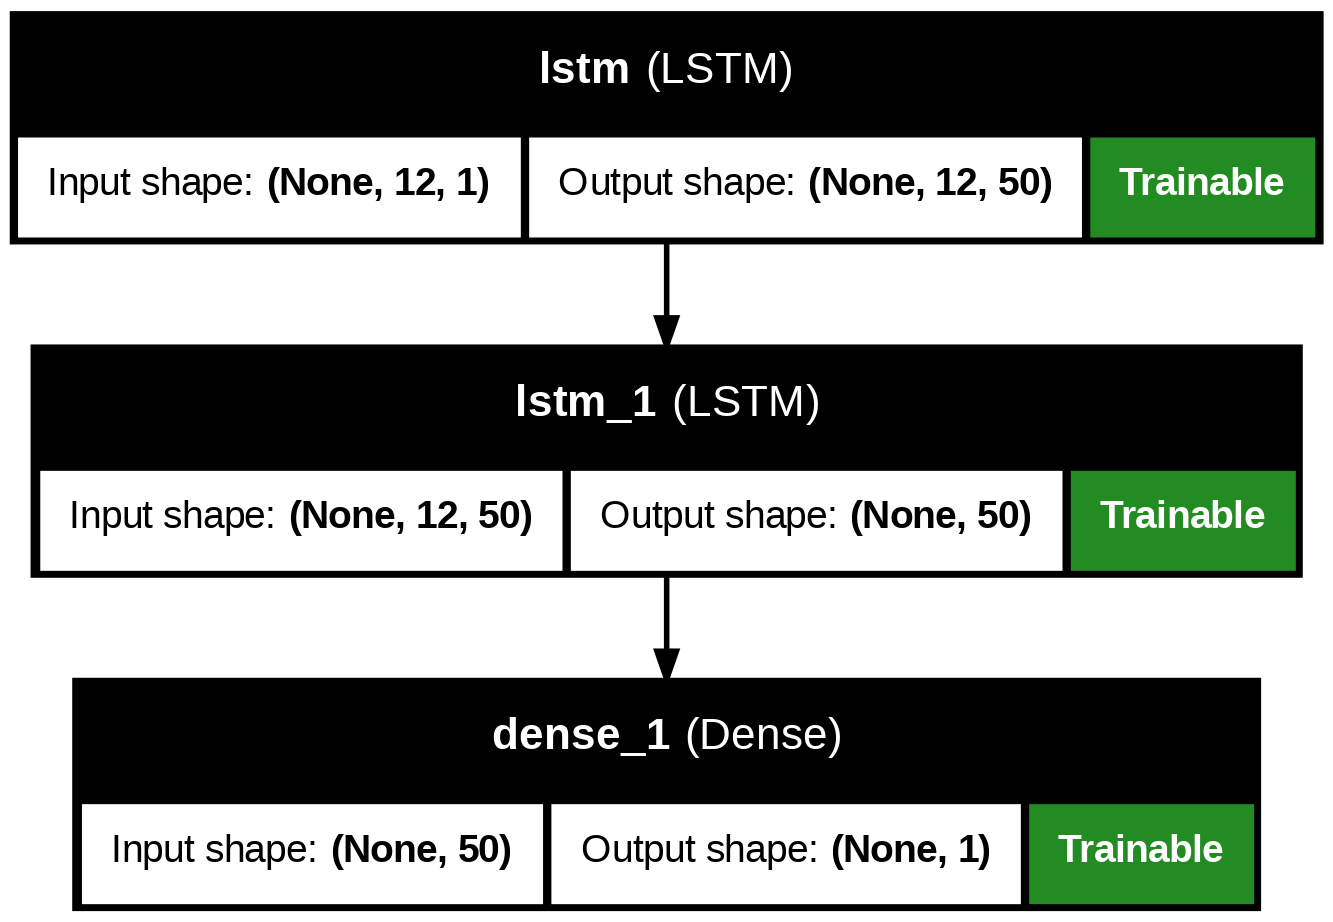

In [56]:
plot_model(LSTM_model ,
    show_shapes=True,
    #show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=False,
    show_trainable=True)

In [57]:
model_args

{'epochs': 15, 'batch_size': 2048, 'verbose': 1}

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1950733, 11), (1950733, 1), (124515, 11), (124515, 1))

In [59]:
LSTM_model, res = pipeline(LSTM_model, X_train, y_train, X_test, y_test, model_args)

training model, please wait...
Epoch 1/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 185s 190ms/step - loss: 0.0015
Epoch 2/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 182s 191ms/step - loss: 7.1067e-04
Epoch 3/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 224s 214ms/step - loss: 6.7248e-04
Epoch 4/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 242s 193ms/step - loss: 6.4192e-04
Epoch 5/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 200s 191ms/step - loss: 6.2526e-04
Epoch 6/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 182s 191ms/step - loss: 6.1690e-04
Epoch 7/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 203s 192ms/step - loss: 6.0265e-04
Epoch 8/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 200s 190ms/step - loss: 6.0005e-04
Epoch 9/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 207s 195ms/step - loss: 5.9219e-04
Epoch 10/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 198s 191ms/step - loss: 5.9256e-04
Epoch 11/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 201s 191ms/step - loss: 5.9160e-04
Epoch 12/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 181s 190ms/step - loss: 5.8317e-04
Epoch 13/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 183s 192ms/step - loss: 5.821

### c. Make predictions and visualize results

In [60]:
df_pred_test["LSTM"] =  LSTM_model.predict(X_test)

3892/3892 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step


In [61]:
compare_preds(df_pred_test)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### d. Compare performance metrics with previous models

In [62]:
report(res, "LSTM", "basic")

## 7. LSTM with Attention
Implement an LSTM model with an Attention layer for power consumption prediction:

### a. Design and train the LSTM model with Attention

In [63]:
# initializing context length, goes to decoder
d = 4
# the rest is historical  context, goes to encoder

t    = df.iloc[:,0:d]
Xdec = df.iloc[:,1:(d+1)]
Xenc = df.iloc[:,(d+1):]

[Xenc.shape, Xdec.shape], t.shape

([(2075248, 7), (2075248, 4)], (2075248, 4))

In [64]:
#Split the data into train and test sets
X_train, y_train = [Xenc[:cutoff], Xdec[:cutoff]], t[:cutoff]
X_test , y_test  = [Xenc[cutoff:], Xdec[cutoff:]], t[cutoff:]

In [65]:
[X_train[0].shape, X_train[1].shape], y_train.shape

([(1950733, 7), (1950733, 4)], (1950733, 4))

In [66]:
# Attention-based Encoder-Decoder model

encoder_input = Input(shape=(Xenc.shape[1], 1), name= "encoder_input")
encoder_lstm = LSTM(32, return_sequences=True, name="encoder_lstm")(encoder_input)

decoder_input = Input(shape=(Xdec.shape[1], 1), name= "decoder_input")
decoder_lstm = LSTM(32, return_sequences=True, name="decoder_lstm")(decoder_input)

attention = Attention(name = "attention")([decoder_lstm, encoder_lstm])
combined = Concatenate(axis=-1)([decoder_lstm, attention])

output = Dense(1)(combined)

attention_model = Model(inputs=[encoder_input, decoder_input], outputs=output)
attention_model.compile(optimizer='adam', loss='mse')


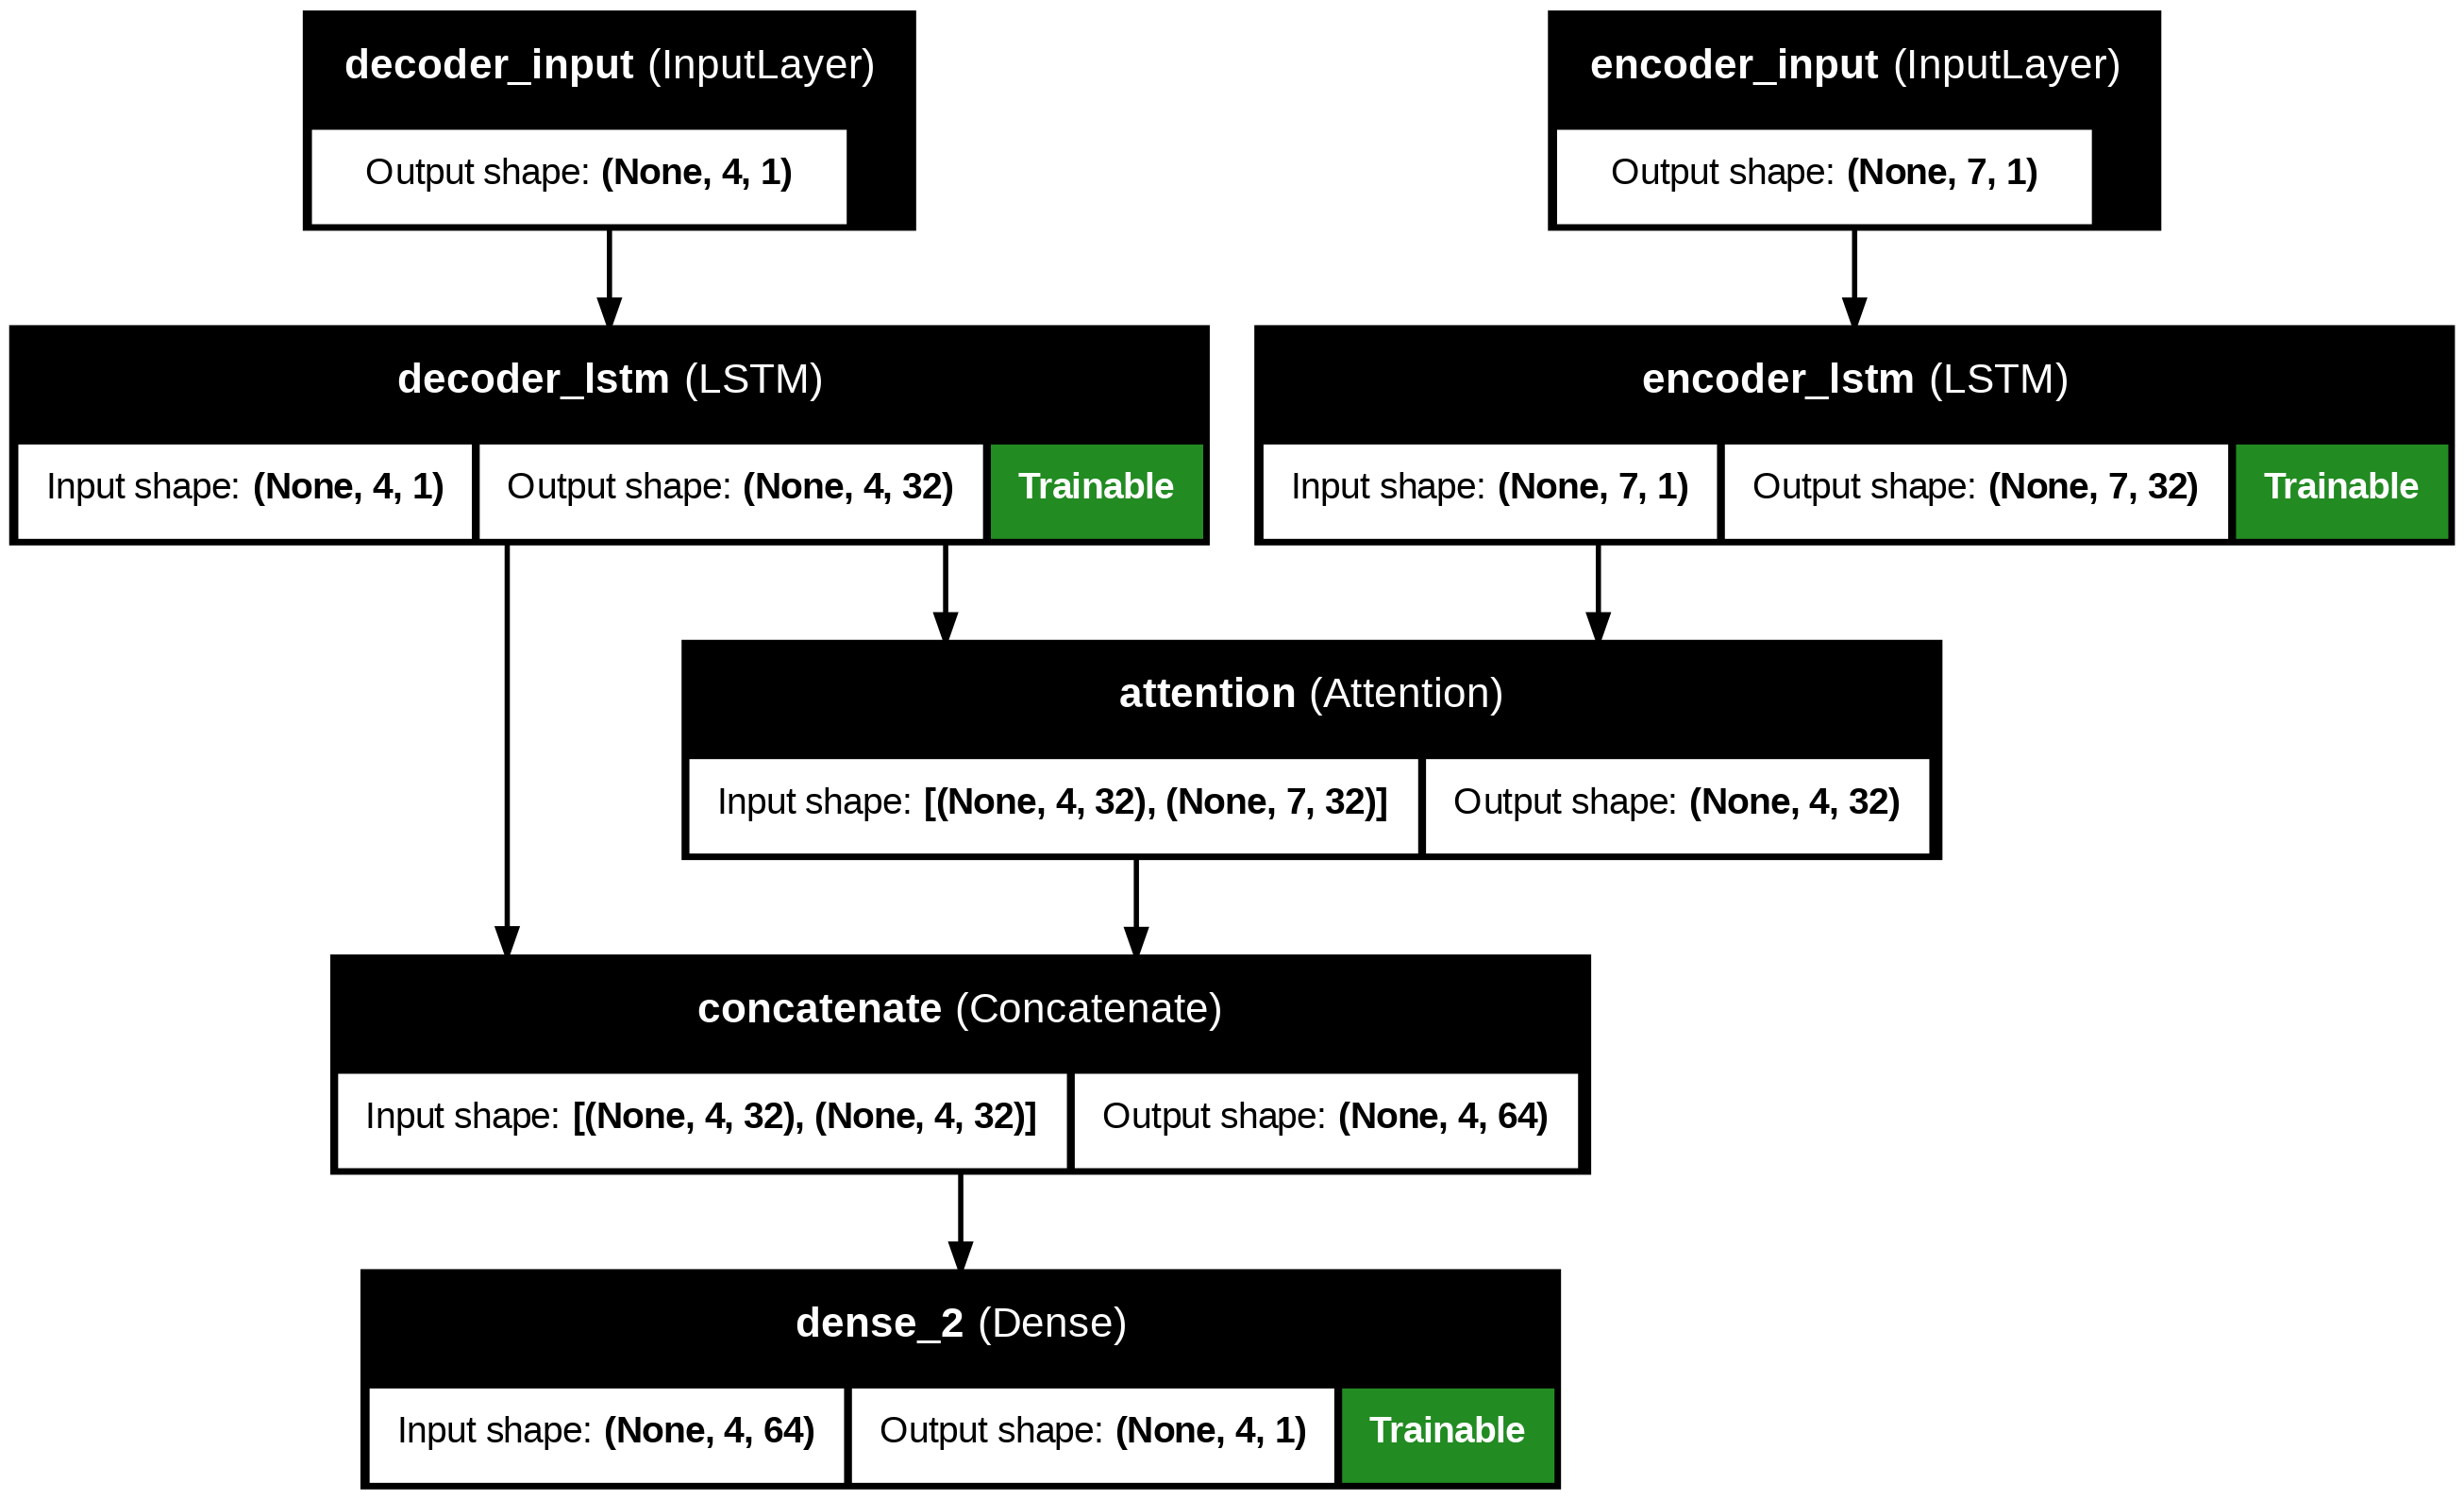

In [67]:

plot_model(attention_model,
    show_shapes=True,
    #show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=False,
    show_trainable=True)

In [68]:
attention_model, res = pipeline(attention_model,
                                X_train, y_train,
                                X_test, y_test,
                                model_args)

training model, please wait...
Epoch 1/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 68s 67ms/step - loss: 0.0023
Epoch 2/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - loss: 2.8978e-04
Epoch 3/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - loss: 1.6033e-04
Epoch 4/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 63s 66ms/step - loss: 1.4980e-04
Epoch 5/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 64s 67ms/step - loss: 1.4668e-04
Epoch 6/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - loss: 1.4531e-04
Epoch 7/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 84s 69ms/step - loss: 1.4411e-04
Epoch 8/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - loss: 1.4346e-04
Epoch 9/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - loss: 1.4338e-04
Epoch 10/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - loss: 1.4330e-04
Epoch 11/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 65s 68ms/step - loss: 1.4317e-04
Epoch 12/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - loss: 1.4320e-04
Epoch 13/15
953/953 ━━━━━━━━━━━━━━━━━━━━ 64s 67ms/step - loss: 1.4350e-04
Epoch 14/15
953/953 

### b. Make predictions and visualize results

In [69]:
att_pred =  attention_model.predict(X_test)

3892/3892 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


In [70]:
df_pred_test["ATTN"] = att_pred[:,0]

In [71]:
compare_preds(df_pred_test)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### c. Compare performance metrics with previous models

In [72]:
report(res, "ATTN", "basic")

### d. Analyze the Attention weights to interpret model focus

## 9. Data reduction experiment:

### a. Remove up to 10% of the data randomly

In [73]:
remove_n = int(len(df) * 0.10)
print(f"will remove {remove_n} rows")
drop_indices = np.random.choice(df.index, remove_n, replace=False)
dfm = df.drop(drop_indices)

cutoff = int(len(dfm) * 0.9) # size of train
dfm

will remove 207524 rows


Global_active_power  Global_active_power.L1  \
datetime                                                           
2006-12-16 17:36:00               0.4661                  0.4831   
2006-12-16 17:37:00               0.4700                  0.4661   
2006-12-16 17:38:00               0.3601                  0.4700   
2006-12-16 17:39:00               0.2995                  0.3601   
2006-12-16 17:41:00               0.3036                  0.2892   
...                                  ...                     ...   
2010-11-26 20:57:00               0.0788                  0.0784   
2010-11-26 20:58:00               0.0788                  0.0788   
2010-11-26 20:59:00               0.0786                  0.0788   
2010-11-26 21:01:00               0.0777                  0.0780   
2010-11-26 21:02:00               0.0775                  0.0777   

                     Global_active_power.L2  Global_active_power.L3  \
datetime                                                              
2006-12-16 17:36:00                  0.3958                  0.3246   
2006-12-16 17:37:00                  0.4831                  0.3958   
2006-12-16 17:38:00                  0.4661                  0.4831   
2006-12-16 17:39:00                  0.4700                  0.4661   
2006-12-16 17:41:00                  0.2995                  0.3601   
...                                     ...                     ...   
2010-11-26 20:57:00                  0.0788                  0.0788   
2010-11-26 20:58:00                  0.0784                  0.0788   
2010-11-26 20:59:00                  0.0788                  0.0784   
2010-11-26 21:01:00                  0.0786                  0.0788   
2010-11-26 21:02:00                  0.0780                  0.0786   

                     Global_active_power.L4  Global_active_power.L5  \
datetime                                                              
2006-12-16 17:36:00                  0.3252                  0.3281   
2006-12-16 17:37:00                  0.3246                  0.3252   
2006-12-16 17:38:00                  0.3958                  0.3246   
2006-12-16 17:39:00                  0.4831                  0.3958   
2006-12-16 17:41:00                  0.4700                  0.4661   
...                                     ...                     ...   
2010-11-26 20:57:00                  0.0786                  0.0788   
2010-11-26 20:58:00                  0.0788                  0.0786   
2010-11-26 20:59:00                  0.0788                  0.0788   
2010-11-26 21:01:00                  0.0788                  0.0784   
2010-11-26 21:02:00                  0.0788                  0.0788   

                     Global_active_power.L6  Global_active_power.L7  \
datetime                                                              
2006-12-16 17:36:00                  0.3283                  0.3118   
2006-12-16 17:37:00                  0.3281                  0.3283   
2006-12-16 17:38:00                  0.3252                  0.3281   
2006-12-16 17:39:00                  0.3246                  0.3252   
2006-12-16 17:41:00                  0.4831                  0.3958   
...                                     ...                     ...   
2010-11-26 20:57:00                  0.0858                  0.1016   
2010-11-26 20:58:00                  0.0788                  0.0858   
2010-11-26 20:59:00                  0.0786                  0.0788   
2010-11-26 21:01:00                  0.0788                  0.0788   
2010-11-26 21:02:00                  0.0784                  0.0788   

                     Global_active_power.L8  Global_active_power.L9  \
datetime                                                              
2006-12-16 17:36:00                  0.3250                  0.4809   
2006-12-16 17:37:00                  0.3118                  0.3250   
2006-12-16 17:38:00                  0.3283                  0.3118   
2006-12-1

In [74]:

# Split the data into feature and target
target = "Global_active_power"
t = dfm[target]
P = dfm.drop(columns= target)


In [75]:
# DATA FOR lstm+Attn
# initializing context length, goes to decoder
d = 4
# the rest is historical  context, goes to encoder

tdec = dfm.iloc[:,0:d]
Xdec = dfm.iloc[:,1:(d+1)]
Xenc = dfm.iloc[:,(d+1):]

[Xenc.shape, Xdec.shape], t.shape

([(1867724, 7), (1867724, 4)], (1867724,))

In [76]:
#Split the data into train and test sets
X_train, y_train = P[:cutoff], t[:cutoff]
X_test, y_test = P[cutoff:], t[cutoff:]


In [77]:
dfm.shape, X_train.shape, y_train.shape

((1867724, 12), (1680951, 11), (1680951,))

### b. Retrain and evaluate all three models

In [78]:

baseline_model = DummyRegressor(strategy='mean')
baseline_model, baseline_res = pipeline(baseline_model, X_train, y_train, X_test, y_test)


training model, please wait...
evaluating model, please wait...
1) y_train.shape:  (1680951,) | y_trn_pred.shape:  (1680951,)
2) y_train.shape:  (1680951,) | y_trn_pred.shape:  (1680951,)
1) y_test.shape:  (186773,) | y_pred.shape:  (186773,)
2) y_test.shape:  (186773,) | y_pred.shape:  (186773,)
done


In [79]:

LR_model = LinearRegression()
LR_model, LR_res = pipeline(LR_model, X_train, y_train, X_test, y_test)


training model, please wait...
evaluating model, please wait...
1) y_train.shape:  (1680951,) | y_trn_pred.shape:  (1680951,)
2) y_train.shape:  (1680951,) | y_trn_pred.shape:  (1680951,)
1) y_test.shape:  (186773,) | y_pred.shape:  (186773,)
2) y_test.shape:  (186773,) | y_pred.shape:  (186773,)
done


In [80]:
# playing around
model_args = {"epochs":epochs, "batch_size":256, "verbose":verbose}
# margs = model_args.copy()
# model_args.pop("batch_size")

# print(asd)
print(model_args)


{'epochs': 15, 'batch_size': 256, 'verbose': 1}


In [81]:

Rnn_model = clone_model(Rnn_model)
Rnn_model.compile(optimizer='adam', loss='mse')
Rnn_model, Rnn_res = pipeline(Rnn_model, X_train, y_train, X_test, y_test, model_args)


training model, please wait...
Epoch 1/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 8.9290e-04
Epoch 2/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 5.7022e-04
Epoch 3/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 5.6495e-04
Epoch 4/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 5.5801e-04
Epoch 5/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 5.5388e-04
Epoch 6/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.5318e-04
Epoch 7/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 5.4814e-04
Epoch 8/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.4043e-04
Epoch 9/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.3867e-04
Epoch 10/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 5.3875e-04
Epoch 11/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 5.4084e-04
Epoch 12/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 5.3843e-04
Epoch 13/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 5.3672e-04
Epo

In [82]:

LSTM_model = clone_model(LSTM_model)
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model, LSTM_res = pipeline(LSTM_model, X_train, y_train, X_test, y_test, model_args)


training model, please wait...
Epoch 1/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 277s 42ms/step - loss: 0.0010
Epoch 2/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 275s 42ms/step - loss: 6.4346e-04
Epoch 3/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 274s 42ms/step - loss: 6.0748e-04
Epoch 4/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 278s 42ms/step - loss: 5.9507e-04
Epoch 5/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 320s 42ms/step - loss: 5.8527e-04
Epoch 6/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 325s 42ms/step - loss: 5.8224e-04
Epoch 7/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 320s 42ms/step - loss: 5.7738e-04
Epoch 8/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 324s 43ms/step - loss: 5.7748e-04
Epoch 9/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 325s 43ms/step - loss: 5.7462e-04
Epoch 10/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 321s 43ms/step - loss: 5.7487e-04
Epoch 11/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 323s 43ms/step - loss: 5.7190e-04
Epoch 12/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 322s 43ms/step - loss: 5.7227e-04
Epoch 13/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 283s 43ms/step 

In [83]:
#Split the data into train and test sets
X_train, y_train = [Xenc[:cutoff], Xdec[:cutoff]], tdec[:cutoff]
X_test , y_test  = [Xenc[cutoff:], Xdec[cutoff:]], tdec[cutoff:]

In [84]:

attention_model = clone_model(attention_model)
attention_model.compile(optimizer='adam', loss='mse')
attention_model, attn_res = pipeline(attention_model,
                                X_train, y_train,
                                X_test, y_test, model_args)


training model, please wait...
Epoch 1/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 100s 14ms/step - loss: 5.8261e-04
Epoch 2/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 93s 14ms/step - loss: 1.4964e-04
Epoch 3/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 142s 14ms/step - loss: 1.5019e-04
Epoch 4/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 142s 14ms/step - loss: 1.4818e-04
Epoch 5/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 94s 14ms/step - loss: 1.4790e-04
Epoch 6/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 142s 14ms/step - loss: 1.4895e-04
Epoch 7/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - loss: 1.4668e-04
Epoch 8/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 144s 14ms/step - loss: 1.4796e-04
Epoch 9/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - loss: 1.4833e-04
Epoch 10/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/step - loss: 1.4778e-04
Epoch 11/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - loss: 1.4798e-04
Epoch 12/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 139s 14ms/step - loss: 1.4782e-04
Epoch 13/15
6567/6567 ━━━━━━━━━━━━━━━━━━━━ 143s 14ms/ste

### c. Compare how data reduction affects each model's performance

In [85]:
report(baseline_res, "Baseline", "reduction")
report(LR_res, "LinearRegression", "reduction")
report(Rnn_res, "RNN", "reduction")
report(LSTM_res, "LSTM", "reduction")
report(attn_res, "ATTN", "reduction")

## 10. Data resolution experiment:

### a. Reduce the time resolution of the data by 50% (e.g., from minute-level to 2-minute intervals)

In [86]:
taake = range(0, len(df), 2)
dfm = df.iloc[taake]
cutoff = int(len(dfm) * 0.9) # size of train

In [87]:

# Split the data into feature and target
target = "Global_active_power"
t = dfm[target]
P = dfm.drop(columns= target)


In [88]:
# DATA FOR lstm+Attn
# initializing context length, goes to decoder
d = 4
# the rest is historical  context, goes to encoder

tdec = dfm.iloc[:,0:d]
Xdec = dfm.iloc[:,1:(d+1)]
Xenc = dfm.iloc[:,(d+1):]

[Xenc.shape, Xdec.shape], t.shape

([(1037624, 7), (1037624, 4)], (1037624,))

In [89]:
# Split the data into feature and target
target = "Global_active_power"
t = dfm[target]
P = dfm.drop(columns= target)

In [90]:
#Split the data into train and test sets
X_train, y_train = P[:cutoff], t[:cutoff]
X_test, y_test = P[cutoff:], t[cutoff:]

In [91]:
df.shape, X_train.shape, y_train.shape

((2075248, 12), (933861, 11), (933861,))

### b. Retrain and evaluate all three models

In [92]:

baseline_model = DummyRegressor(strategy='mean')
baseline_model, baseline_res = pipeline(baseline_model, X_train, y_train, X_test, y_test)


training model, please wait...
evaluating model, please wait...
1) y_train.shape:  (933861,) | y_trn_pred.shape:  (933861,)
2) y_train.shape:  (933861,) | y_trn_pred.shape:  (933861,)
1) y_test.shape:  (103763,) | y_pred.shape:  (103763,)
2) y_test.shape:  (103763,) | y_pred.shape:  (103763,)
done


In [93]:

LR_model = LinearRegression()
LR_model, LR_res = pipeline(LR_model, X_train, y_train, X_test, y_test)


training model, please wait...
evaluating model, please wait...
1) y_train.shape:  (933861,) | y_trn_pred.shape:  (933861,)
2) y_train.shape:  (933861,) | y_trn_pred.shape:  (933861,)
1) y_test.shape:  (103763,) | y_pred.shape:  (103763,)
2) y_test.shape:  (103763,) | y_pred.shape:  (103763,)
done


In [94]:

Rnn_model = clone_model(Rnn_model)
Rnn_model.compile(optimizer='adam', loss='mse')
Rnn_model, Rnn_res = pipeline(Rnn_model, X_train, y_train, X_test, y_test, model_args)


training model, please wait...
Epoch 1/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.0022
Epoch 2/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 6.0091e-04
Epoch 3/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 5.9096e-04
Epoch 4/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 5.8388e-04
Epoch 5/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 5.7971e-04
Epoch 6/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5.8470e-04
Epoch 7/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 5.7020e-04
Epoch 8/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 5.6735e-04
Epoch 9/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5.6135e-04
Epoch 10/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 5.5603e-04
Epoch 11/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 5.5728e-04
Epoch 12/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5.5886e-04
Epoch 13/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 5.5241e-04
Epoch 1

In [95]:

LSTM_model = clone_model(LSTM_model)
LSTM_model.compile(optimizer='adam', loss='mse')
LSTM_model, LSTM_res = pipeline(LSTM_model, X_train, y_train, X_test, y_test, model_args)


training model, please wait...
Epoch 1/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 157s 42ms/step - loss: 0.0012
Epoch 2/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 202s 42ms/step - loss: 7.0589e-04
Epoch 3/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 153s 42ms/step - loss: 6.3998e-04
Epoch 4/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 202s 42ms/step - loss: 6.0949e-04
Epoch 5/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 202s 42ms/step - loss: 6.0539e-04
Epoch 6/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 154s 42ms/step - loss: 6.0013e-04
Epoch 7/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 201s 42ms/step - loss: 5.9509e-04
Epoch 8/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 202s 42ms/step - loss: 5.9355e-04
Epoch 9/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 154s 42ms/step - loss: 5.8770e-04
Epoch 10/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 199s 41ms/step - loss: 5.8862e-04
Epoch 11/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 152s 42ms/step - loss: 5.8365e-04
Epoch 12/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 204s 42ms/step - loss: 5.8383e-04
Epoch 13/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 201s 42ms/step 

In [96]:
#Split the data into train and test sets
X_train, y_train = [Xenc[:cutoff], Xdec[:cutoff]], tdec[:cutoff]
X_test , y_test  = [Xenc[cutoff:], Xdec[cutoff:]], tdec[cutoff:]

In [97]:

attention_model = clone_model(attention_model)
attention_model.compile(optimizer='adam', loss='mse')
attention_model, attn_res = pipeline(attention_model,
                                X_train, y_train,
                                X_test, y_test, model_args)


training model, please wait...
Epoch 1/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 54s 14ms/step - loss: 0.0011
Epoch 2/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - loss: 1.5509e-04
Epoch 3/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - loss: 1.4892e-04
Epoch 4/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - loss: 1.4988e-04
Epoch 5/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - loss: 1.4740e-04
Epoch 6/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - loss: 1.4905e-04
Epoch 7/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - loss: 1.4572e-04
Epoch 8/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - loss: 1.4758e-04
Epoch 9/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - loss: 1.4876e-04
Epoch 10/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - loss: 1.4849e-04
Epoch 11/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - loss: 1.4744e-04
Epoch 12/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - loss: 1.4730e-04
Epoch 13/15
3648/3648 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - loss: 1.475

### c. Analyze how changes in data resolution impact each model's performance

In [98]:
report(baseline_res, "Baseline", "resolution")
report(LR_res, "LinearRegression", "resolution")
report(Rnn_res, "RNN", "resolution")
report(LSTM_res, "LSTM", "resolution")
report(attn_res, "ATTN", "resolution")

## 8. Data augmentation experiment:

### a. Modify up to 10% of the dataset to potentially improve prediction results
I did not understand how I should modify the dataset to improve results, so I just added another variable to the mix.

In [10]:
def preprocess(X, colname,  time_step = 12):
    df = X[colname].resample("1min").mean().ffill().to_frame()
    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    tmp = scaler.fit_transform(df)
    df[colname] = tmp

    for lag in range(1,time_step):
        df[f"{colname}.L{lag}"] = df[colname].shift(lag)

    df.dropna(inplace = True)
    return df

gap = preprocess(X, "Global_active_power")
grp = preprocess(X, "Global_reactive_power")
df = gap.join(grp)

### b. Retrain and evaluate all three models (RNN, LSTM, LSTM with Attention)

In [12]:
# Split the data into feature and target
target = "Global_active_power"
t = df[target]
P = df.drop(columns= target)

cutoff = int(len(df) * 0.9)
#Split the data into train and test sets
X_train, y_train = P[:cutoff], t[:cutoff]
X_test, y_test = P[cutoff:], t[cutoff:]

#### Classic

In [13]:

baseline_model = DummyRegressor(strategy='mean')
baseline_model, baseline_res = pipeline(baseline_model, X_train, y_train, X_test, y_test)


NameError: name 'pipeline' is not defined

In [102]:

LR_model = LinearRegression()
LR_model, LR_res = pipeline(LR_model, X_train, y_train, X_test, y_test)


training model, please wait...
evaluating model, please wait...
1) y_train.shape:  (933861,) | y_trn_pred.shape:  (933861,)
2) y_train.shape:  (933861,) | y_trn_pred.shape:  (933861,)
1) y_test.shape:  (1141387,) | y_pred.shape:  (1141387,)
2) y_test.shape:  (1141387,) | y_pred.shape:  (1141387,)
done


#### RNN

In [103]:
#sequence_length = X_train.shape[1]

# Build an RNN model
Rnn_model = Sequential([
    Input((X_train.shape[1], 1)),
    SimpleRNN(units=32, activation='relu'),
    Dense(units=1)
])

Rnn_model.compile(optimizer='adam', loss='mse')


In [104]:
model_args = {"epochs":epochs, "batch_size":batch_size, "verbose": verbose}

In [105]:
Rnn_model, RNN_res = pipeline(Rnn_model, X_train, y_train, X_test, y_test, model_args)

training model, please wait...
Epoch 1/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 0.0065
Epoch 2/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 6.9809e-04
Epoch 3/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 6.6830e-04
Epoch 4/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 6.6525e-04
Epoch 5/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - loss: 6.6115e-04
Epoch 6/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - loss: 6.5674e-04
Epoch 7/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 6.5057e-04
Epoch 8/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 6.4893e-04
Epoch 9/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 6.5093e-04
Epoch 10/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 6.4549e-04
Epoch 11/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 6.5205e-04
Epoch 12/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 6.3864e-04
Epoch 13/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 6.4014e-04
Epoch 14/15
456/456 

#### LSTM  
Requires slightly different preprocessing:

In [106]:
gap = np.expand_dims(gap.values, axis=2)
grp = np.expand_dims(grp.values, axis=2)
arr = np.concatenate([gap, grp], axis=2)

In [107]:
# Split the data into feature and target
t = arr[:,0,:]
P = arr[:,1:,:]
#Split the data into train and test sets
X_train, y_train = P[:cutoff], t[:cutoff]
X_test, y_test = P[cutoff:], t[cutoff:]

In [108]:
X_train.shape, y_train.shape

((933861, 11, 2), (933861, 2))

In [109]:
input_dim = X_train.shape[1:3]
input_dim

(11, 2)

In [110]:
# Create and fit the LSTM network
LSTM_model = Sequential()
LSTM_model.add(Input(input_dim))
LSTM_model.add(LSTM(50, return_sequences=True ))
LSTM_model.add(LSTM(50, return_sequences=False))
LSTM_model.add(Dense(input_dim[1]))

LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

model_args = {"epochs":epochs, "batch_size":32, "verbose":verbose}

In [ ]:
LSTM_model, LSTM_res = pipeline(LSTM_model, X_train, y_train, X_test, y_test, model_args)

training model, please wait...
Epoch 1/15
29184/29184 ━━━━━━━━━━━━━━━━━━━━ 363s 12ms/step - loss: 0.0011
Epoch 2/15
29184/29184 ━━━━━━━━━━━━━━━━━━━━ 387s 12ms/step - loss: 7.4763e-04
Epoch 3/15
11163/29184 ━━━━━━━━━━━━━━━━━━━━ 3:39 12ms/step - loss: 7.2273e-04

#### LSTM with attention

In [ ]:
# initial context length, goes to decoder
d = 4
# the rest is historical  context, goes to encoder

t    = arr[:,0:d]
Xdec = arr[:,1:(d+1)]
Xenc = arr[:,(d+1):]

t.shape, Xdec.shape, Xenc.shape

In [ ]:

#Split the data into train and test sets

X_train, y_train = [Xenc[:cutoff], Xdec[:cutoff]], t[:cutoff]
X_test , y_test  = [Xenc[cutoff:], Xdec[cutoff:]], t[cutoff:]

In [ ]:
[X_train[0].shape, X_train[1].shape], y_train.shape

In [ ]:
[X_test[0].shape, X_test[1].shape], y_test.shape

In [ ]:
# Attention-based Encoder-Decoder model

encoder_input = Input(shape=Xenc.shape[1:3], name= "encoder_input")
encoder_lstm = LSTM(32, return_sequences=True, name="encoder_lstm")(encoder_input)

decoder_input = Input(shape=Xdec.shape[1:3], name= "decoder_input")
decoder_lstm = LSTM(32, return_sequences=True, name="decoder_lstm")(decoder_input)

attention = Attention(name = "attention")([decoder_lstm, encoder_lstm])
combined = Concatenate(axis=-1)([decoder_lstm, attention])

output = Dense(Xenc.shape[2])(combined)

attention_model = Model(inputs=[encoder_input, decoder_input], outputs=output)
attention_model.compile(optimizer='adam', loss='mse')
#, metrics= <keras.metrics.>[mean_squared_error,
# RootMeanSquaredError, mean_absolute_error, R2Score])


In [ ]:
plot_model(attention_model ,
    show_shapes=True,
    #show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=False,
    show_trainable=True)

In [ ]:
attention_model, attention_res = pipeline(attention_model,
                                X_train, y_train,
                                X_test, y_test,
                                model_args)

### c. Compare the impact of data changes on each model's performance
  

In [ ]:
report(baseline_res, "Baseline", "augmented")
report(LR_res, "LinearRegression", "augmented")
report(RNN_res,  "RNN",  "augmented")
report(LSTM_res, "LSTM", "augmented")
report(attention_res, "ATTN", "augmented")

## 11. Conclusion and insights:

- Summarize findings from all experiments
- Discuss which model performed best under different conditions
- Provide insights on the dataset's characteristics and their impact on model performance